<a href="https://colab.research.google.com/github/edabezek/ChurnPrediction/blob/main/ChurnPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
df = pd.read_excel('Telco-Customer-Churn.xlsx')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   object
 1   gender            7043 non-null   object
 2   SeniorCitizen     7043 non-null   int64 
 3   Partner           7043 non-null   object
 4   Dependents        7043 non-null   object
 5   tenure            7043 non-null   int64 
 6   PhoneService      7043 non-null   object
 7   MultipleLines     7043 non-null   object
 8   InternetService   7043 non-null   object
 9   OnlineSecurity    7043 non-null   object
 10  OnlineBackup      7043 non-null   object
 11  DeviceProtection  7043 non-null   object
 12  TechSupport       7043 non-null   object
 13  StreamingTV       7043 non-null   object
 14  StreamingMovies   7043 non-null   object
 15  Contract          7043 non-null   object
 16  PaperlessBilling  7043 non-null   object
 17  PaymentMethod 

In [ ]:
df.describe()

,SeniorCitizen,tenure
count,7043.000000,7043.000000
mean,0.162147,32.371149
std,0.368612,24.559481
min,0.000000,0.000000
25%,0.000000,9.000000
50%,0.000000,29.000000
75%,0.000000,55.000000
max,1.000000,72.000000


In [ ]:
#Churn column is string with Yes/No values. We convert it to integer to make it easier to use in our analysis.
df.loc[df.Churn=='No','Churn'] = 0 
df.loc[df.Churn=='Yes','Churn'] = 1

In [ ]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,1


In [ ]:
dataset = df["Churn"].value_counts()
dataset
#churn özet

0    5174
1    1869
Name: Churn, dtype: int64

In [ ]:
df1 = pd.read_excel('Telco-Customer-Churn.xlsx')
df1.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes


In [ ]:
# Converting categorical data to numeric 
char_cols = df.dtypes.pipe(lambda x: x[x == 'object']).index
for c in char_cols:
    df[c] = pd.factorize(df[c])[0]
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,0,34,1,1,0,1,1,1,0,0,0,1,1,1,1,1,0
2,2,1,0,1,0,2,1,1,0,1,0,0,0,0,0,0,0,1,2,2,1
3,3,1,0,1,0,45,0,0,0,1,1,1,1,0,0,1,1,2,3,3,0
4,4,0,0,1,0,2,1,1,1,0,1,0,0,0,0,0,0,0,4,4,1


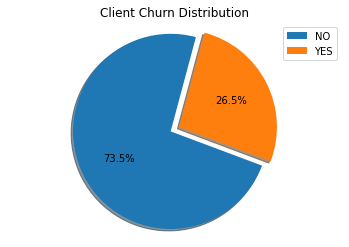

In [ ]:
sizes = [5174,1869] #churn etmeyen ve churn eden müşteri sayıları 
labels='NO','YES'
explode = (0, 0.1)  #pasta grafiğinde churn edenleri bıraz dışarıda göstermesi için
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode,autopct='%1.1f%%',shadow=True, startangle=75 )
ax1.axis('equal') #pasta grafiği orantılı olsun 
ax1.set_title("Client Churn Distribution")

ax1.legend(labels)

plt.show()

In [ ]:
df.groupby('gender').Churn.mean()
#müşteri cinsiyetine göre gruplama yap ve churn edenlerin oranı

gender
0    0.269209
1    0.261603
Name: Churn, dtype: float64

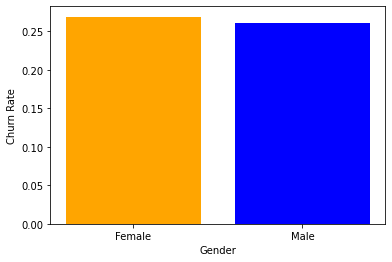

In [ ]:
# create a dataset
Churn_Mean = [0.269209, 0.261603]
Gender = ('Female', 'Male')
x_pos = np.arange(len(Churn_Mean))

# Create bars with different colors
plt.bar(x_pos, Churn_Mean, color=['orange','blue'])

# Create names on the x-axis
plt.xticks(x_pos, Gender)

# Add title and axis names
#plt.title('Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
#plt.legend()

# Show graph
plt.show()

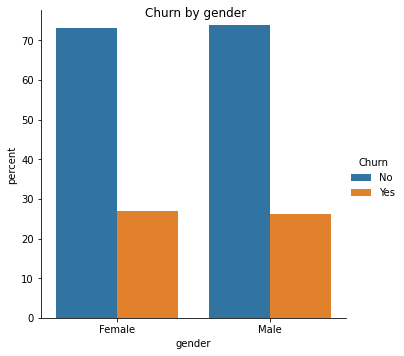

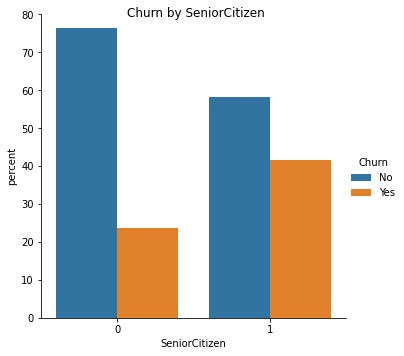

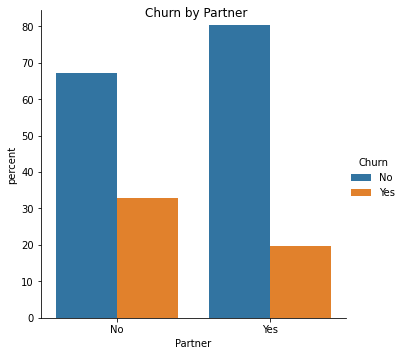

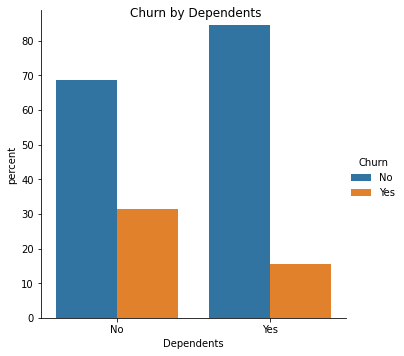

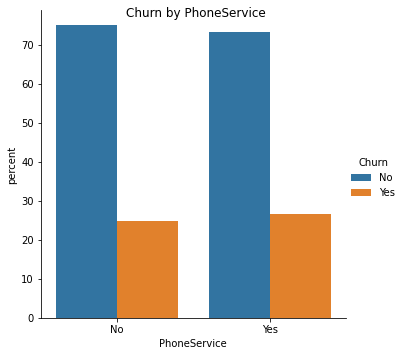

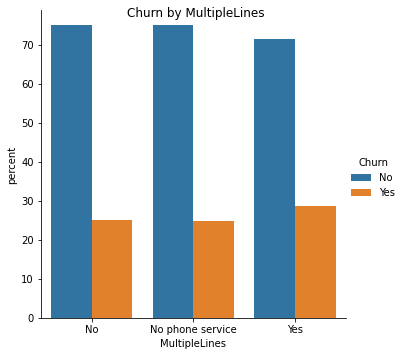

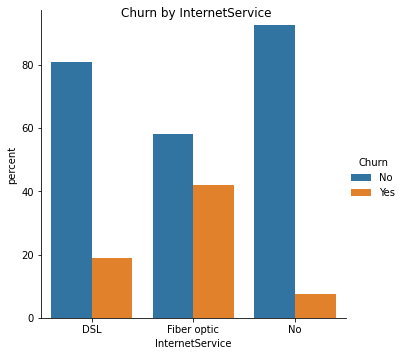

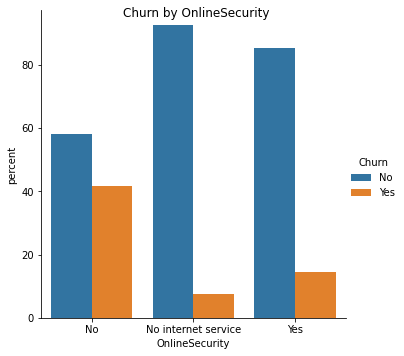

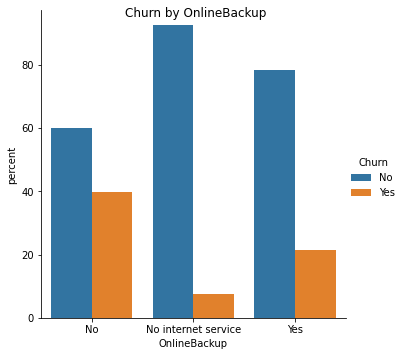

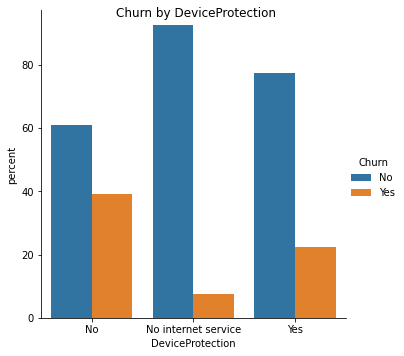

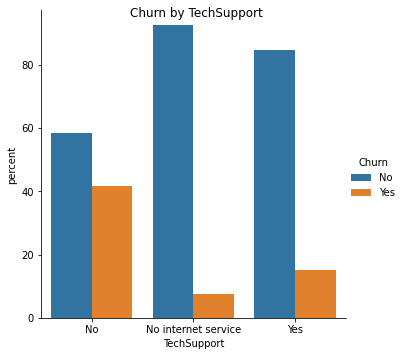

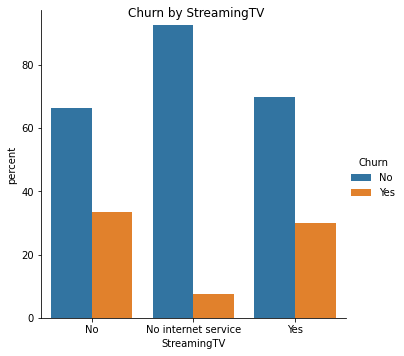

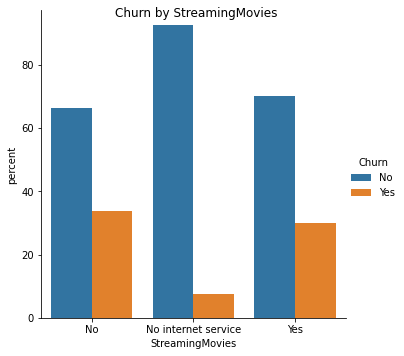

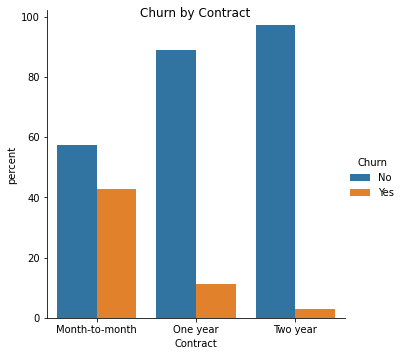

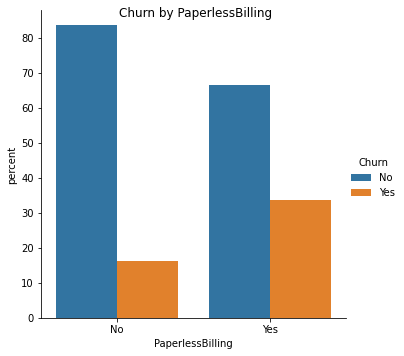

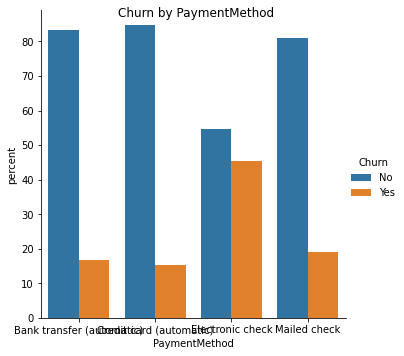

In [ ]:
catvars = df1.columns.tolist()
catvars = [e for e in catvars if e not in ('TotalCharges', 'MonthlyCharges', 
                                           'tenure', 'customerID', 'Churn')]

y = 'Churn'
for x in catvars:
    plot = df1.groupby(x)[y]\
        .value_counts(normalize=True).mul(100)\
        .rename('percent').reset_index()\
        .pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar')
    plot.fig.suptitle("Churn by " + x)
    plot

TENURE
One peak is customers who have been tenured for a very long time; the other peak is customers who joined very recently. We should assume tenure is in the unit of “months”, because this is how services are billed.You can find code below.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


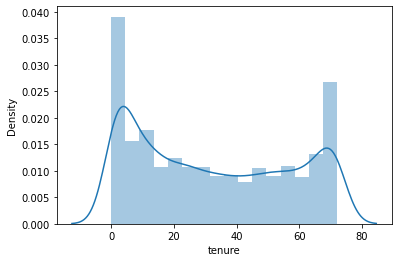

In [ ]:
#Tenure- hizmet süresi ay cinsinden
sns.distplot(df1.tenure) 

CHURN BY TENURE
The first few months of tenure – between months 1-10 – seem to be critical, as this is when most of the churn is happening. There also seems to be a kind of diverging pattern in the middle. Maybe this is some kind of a survivor effect – members who make it past a certain tenure length are more likely to stick it out for the long-term.

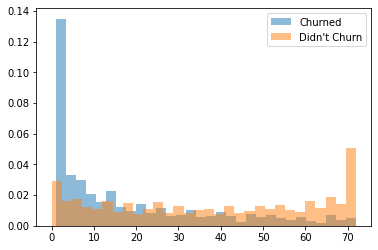

In [ ]:
#Churn by tenure 
bins = 30
plt.hist(df1[df1.Churn == 'Yes'].tenure, 
         bins, alpha=0.5, density=True, label='Churned')
plt.hist(df1[df1.Churn == 'No'].tenure, 
         bins, alpha=0.5, density=True, label="Didn't Churn")
plt.legend(loc='upper right')
plt.show()

CLASSIFIER
Are there any strong correlations? We'll check out.

In [ ]:
churners_number = len(df[df['Churn'] == 1])
print("Number of churners", churners_number)

churners = (df[df['Churn'] == 1])

non_churners = df[df['Churn'] == 0].sample(n=churners_number)
print("Number of non-churners", len(non_churners))
df3 = churners.append(non_churners)

Number of churners 1869
Number of non-churners 1869


In [ ]:
def show_correlations(df, show_chart = True):
    fig = plt.figure(figsize = (20,10))
    corr = df.corr()
    if show_chart == True:
        sns.heatmap(corr, 
                    xticklabels=corr.columns.values,
                    yticklabels=corr.columns.values,
                    annot=True)
    return corr

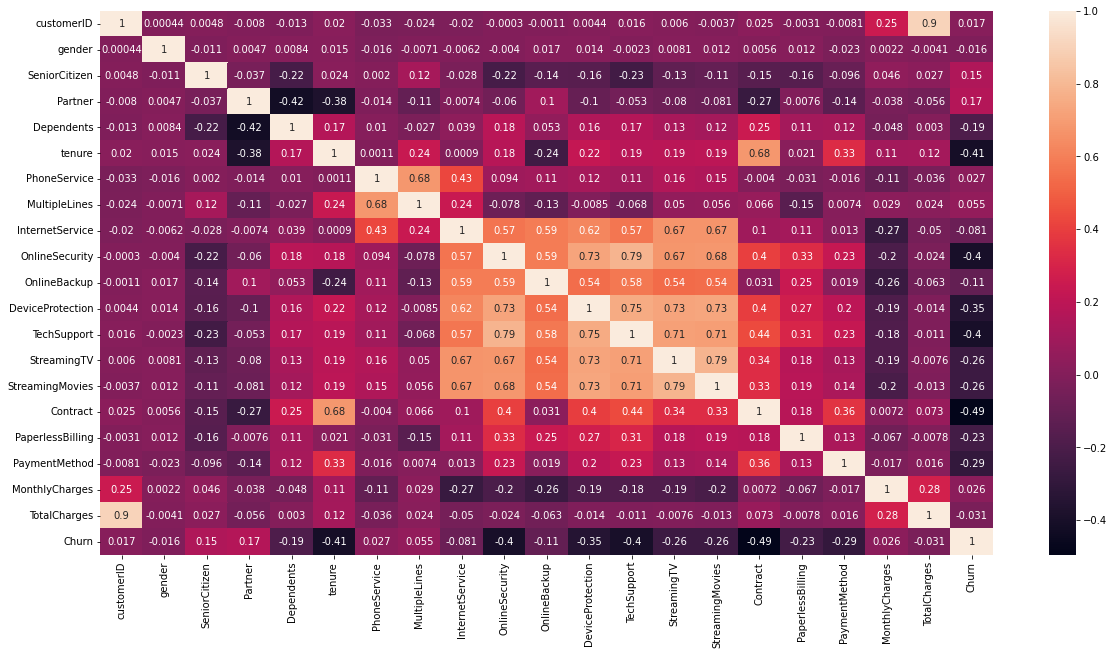

In [ ]:
correlation_df = show_correlations(df3,show_chart=True)

In [ ]:
# Define the target variable (dependent variable) 
y = df.Churn 
df = df.drop(['Churn'], axis= 1)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,0,34,1,1,0,1,1,1,0,0,0,1,1,1,1,1
2,2,1,0,1,0,2,1,1,0,1,0,0,0,0,0,0,0,1,2,2
3,3,1,0,1,0,45,0,0,0,1,1,1,1,0,0,1,1,2,3,3
4,4,0,0,1,0,2,1,1,1,0,1,0,0,0,0,0,0,0,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,1,0,0,1,24,1,2,0,1,1,1,1,1,1,1,0,1,295,6524
7039,7039,0,0,0,1,72,1,2,1,0,0,1,0,1,1,1,0,3,760,6525
7040,7040,0,0,0,1,11,0,0,0,1,1,0,0,0,0,0,0,0,204,6526
7041,7041,1,1,0,0,4,1,2,1,0,1,0,0,0,0,0,0,1,113,6527


In [ ]:
# Splitting training and testing data
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.20)  

In [ ]:
# Applying Support Vector Machine algorithm
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear', degree=8)  
svclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=8, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
SVC(degree=8, kernel='linear')

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=8, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Predicting part, applying the model to predict
y_pred = svclassifier.predict(X_test) 

EVALUATING MODEL PERFORMANCE
Then we apply the Confusion Matrix method to understand how accurate our prediction is. Precision shows how much of what we detect as churn is actually churned. Recall, on the other hand, shows how much of the churn we actually guessed correctly.

The result shows us that the prediction is made at a good level. On average, 77% of the data gives the accuracy share, and 78% shows how accurately we estimate these labels we assign.

In [ ]:
# Evaluating model performance
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))

[[932  93]
 [217 167]]
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1025
           1       0.64      0.43      0.52       384

    accuracy                           0.78      1409
   macro avg       0.73      0.67      0.69      1409
weighted avg       0.77      0.78      0.77      1409

